In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/kaggle/input/netflix-shows/netflix_titles.csv' 
df = pd.read_csv(file_path)

## Count the Number of Movies vs TV Shows.

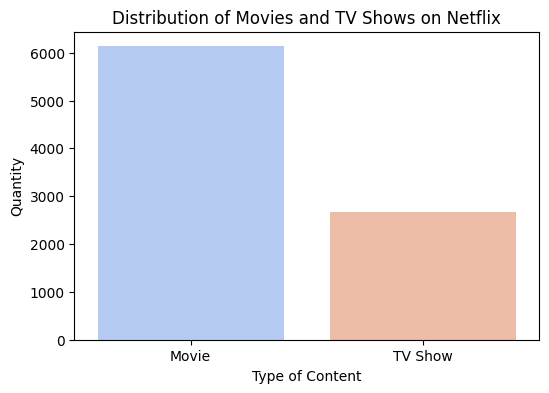

In [3]:
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count'] 

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x='type', y='count', data=type_counts, palette='coolwarm')
plt.xlabel("Type of Content")  
plt.ylabel("Quantity")  
plt.title("Distribution of Movies and TV Shows on Netflix")  
plt.show()

## Find the Most Common Rating for Movies and TV Shows

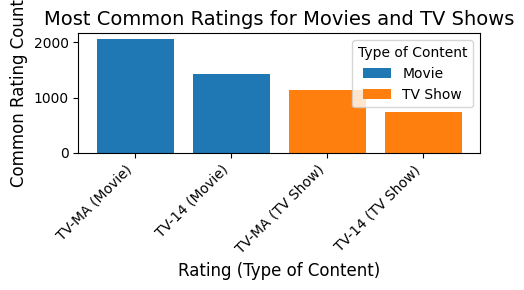

In [4]:
df_filtered = df[['type', 'rating']]

# Group by content type and rating, then count occurrences
grouped_data = df_filtered.groupby(['type', 'rating']).size().reset_index(name='common_rating')

# Find the two most popular ratings for each content type
top_ratings = grouped_data.sort_values(by=['type', 'common_rating'], ascending=[True, False])
top_ratings = top_ratings.groupby('type').head(2)


plt.figure(figsize=(5, 3))

# Generate a bar chart
for i, content_type in enumerate(top_ratings['type'].unique()):
    content_data = top_ratings[top_ratings['type'] == content_type]
    plt.bar(content_data['rating'] + f" ({content_type})", content_data['common_rating'], label=content_type)

# Add labels
plt.xlabel('Rating (Type of Content)', fontsize=12)
plt.ylabel('Common Rating Count', fontsize=12)
plt.title('Most Common Ratings for Movies and TV Shows', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Type of Content")
plt.tight_layout()
plt.show()

## Find the Top 5 Countries with the Most Content on Netflix

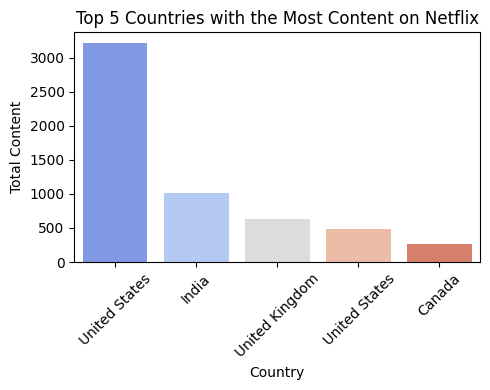

In [5]:
# Split rows with multiple countries  
df_expanded = df['country'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)  
df_expanded.name = 'country'  

# Count the number of content entries for each country  
country_counts = df_expanded.value_counts().reset_index()  
country_counts.columns = ['country', 'total_content']  

# Sort by content count and select the top 5 countries  
top_5_countries = country_counts.head(5)

# Visualization  
plt.figure(figsize=(5, 4))  
sns.barplot(x='country', y='total_content', data=top_5_countries, palette='coolwarm')  
plt.xlabel("Country")  
plt.ylabel("Total Content")  
plt.title("Top 5 Countries with the Most Content on Netflix")  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  

## Find Content Added in the Last 5 Years by Country

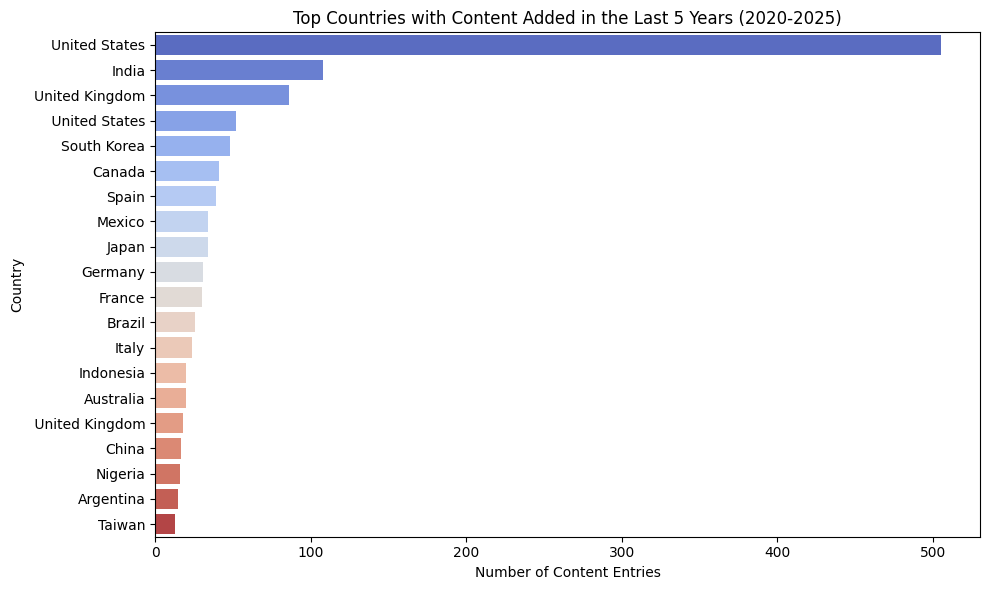

In [6]:
from datetime import datetime

current_year = datetime.now().year

df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Filter content from the last 5 years and split countries
df_recent = df[df['release_year'] >= current_year - 5]
df_expanded = df_recent['country'].dropna().str.split(',', expand=True).stack().reset_index(drop=True)

# Count the number of content entries per country and keep the top 20
country_counts = df_expanded.value_counts().nlargest(20).reset_index()
country_counts.columns = ['country', 'total_content']

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='total_content', y='country', data=country_counts, palette='coolwarm')
plt.xlabel("Number of Content Entries")
plt.ylabel("Country")
plt.title(f"Top Countries with Content Added in the Last 5 Years ({current_year - 5}-{current_year})")
plt.tight_layout()
plt.show()

## Find the average number of content releases in India on Netflix for each of the last 10 years.

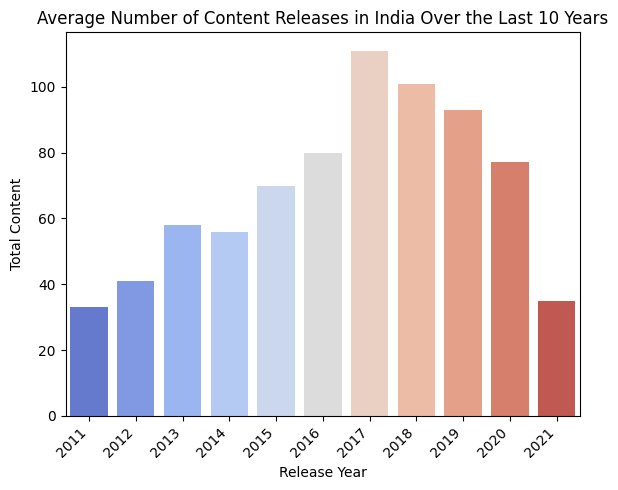

In [7]:
df_india = df[df['country'].str.contains('India', na=False)]

# Group by release year and count the amount of content.
content_by_year = df_india.groupby('release_year').size().reset_index(name='total_release')

# Set the current year as an integer
current_year = 2021

# Filter only the last 10 years
content_by_year = content_by_year[content_by_year['release_year'] >= current_year - 10]

# Sort the data by 'release_year' in ascending order
content_by_year = content_by_year.sort_values(by='release_year', ascending=True)

# Visualization
plt.figure(figsize=(6, 5))
sns.barplot(x=content_by_year['release_year'].astype(str), y='total_release', data=content_by_year, palette='coolwarm')

plt.xlabel("Release Year")
plt.ylabel("Total Content")
plt.title("Average Number of Content Releases in India Over the Last 10 Years")
plt.xticks(rotation=45, ha='right')  # Rotate year labels for better readability
plt.tight_layout()
plt.show()

## Categorize Content Based on the Presence of 'love','romantic','kill' and 'horror' Keywords

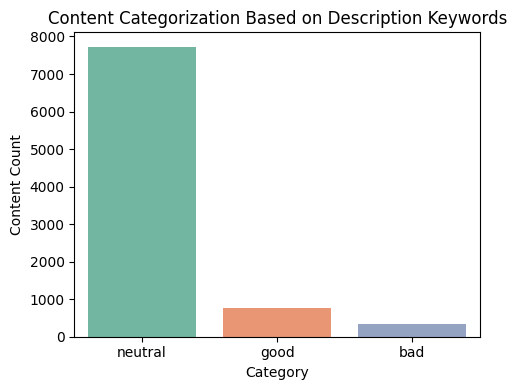

In [8]:
# Function to categorize content based on the description
def categorize_content(description):
    if pd.isna(description):  # Handle missing descriptions
        return 'neutral'
    description = description.lower()
    if 'love' in description or 'romantic' in description:
        return 'good'
    elif 'kill' in description or 'horror' in description:
        return 'bad'
    else:
        return 'neutral'

# Apply the categorization function to the 'description' column
df['category'] = df['description'].apply(categorize_content)

# Count the content in each category
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'content_count']

# Visualization
plt.figure(figsize=(5, 4))
sns.barplot(x='category', y='content_count', data=category_counts, palette='Set2')

plt.xlabel("Category")
plt.ylabel("Content Count")
plt.title("Content Categorization Based on Description Keywords")
plt.tight_layout()
plt.show()